(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

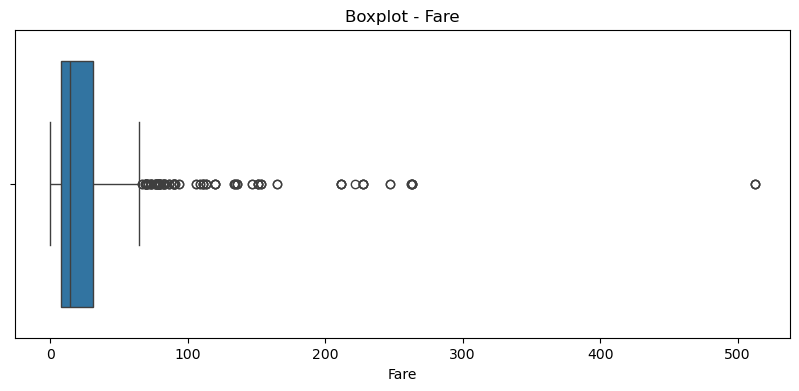

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    1 -0.528321      1      0 -0.779117       False   
2         1       3    0 -0.215182      0      0 -0.729373       False   
3         1       1    0  0.489381      1      0  2.599828       False   
4         0       3    1  0.489381      0      0 -0.720161       False   
5         0       3    1 -0.058613      0      0 -0.690071        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  
         Survived     Pclass         Sex           Age       SibSp  \
count  775.000000  775.00000  775.000000  7.750000e+02  775.000000   
mean     0.339355    2.48000    0.685161 -1.008512e-16    0.437419   
std      0.473796    0.73439    0.464752  1.000646e+00    0.899838   
min      0.000000    1.00000    0.000000 -2.217707e+00    0.000000   
25%      0.000000    2.00000    0.000000 -5.283213e-01    0.000000   
50%      0.000000    3.00000    1.00000

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("titanic.csv")


print(df.shape)
print(df.info())
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop('Cabin', axis=1, inplace=True)

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())
print(df.describe())

df.to_csv("titanic_cleaned.csv", index=False)